
# <p><center style="background-color:#f89fff;font-family:Gabriola;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;">   Credit Card Fraud Detection 📰 </center></p>


# <p><center style="background-color:#f89fee;font-family:Gabriola;color:#665299;font-size:210%;text-align:center;border-radius:10px 60px;">   Classification - Sklearn vs TensorFlow </center></p>

# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 🔠</p>

# 🎈 About The DataSet

#### Context
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


# The Mission 🎯 :

- 1️⃣ Make the Analysis
- 2️⃣ Make ML- Model - Classification - Before Feature Selection || using Sklearn 
- 3️⃣ Make Deep learning - Model - Classification - Before Feature Selection  || using  TensorFlow

- 4️⃣ Make ML- Model - Classification - After Feature Selection  using  ||  Sklearn 
- 5️⃣Make Deep learning - Classification - After Feature Selection using  ||  TensorFlow 

In [1]:
#Importing the basic librarires for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot


In [2]:
#Importing the dataset

df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# look the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a id="2"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#666600;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1️⃣ Explore the Data and Make Preprocess </p>

In [3]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check the missing value - Null 
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- - 📄 No any missing data / missing value 

In [5]:
# let show the describe the numeric feature 
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
#check if there any duplication 
df.duplicated().sum()

1081

- 📄 We have Duplicated values/ we need delete this values 

In [7]:
# drop duplication

df.drop_duplicates(df,inplace=True)

In [8]:
# the shape 
print (f"We have {df.shape[0]} Rows and {df.shape[1]} columns")

We have 283726 Rows and 31 columns


<a id="2"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#666600;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Explore Data using some Visuals </p>

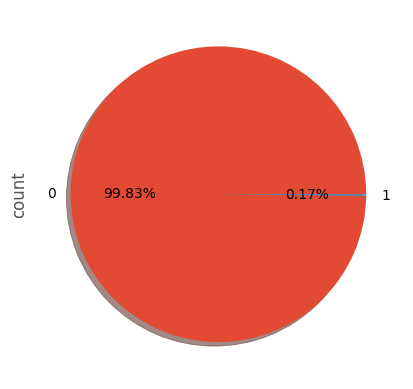

In [9]:
# how many cases fraud in the dataset

df["Class"].value_counts().plot(kind= "pie",autopct='%1.2f%%', shadow = True)
plt.show()

- 0 = Not Fraud 99.8%
- 1 = Fraud  0.17%

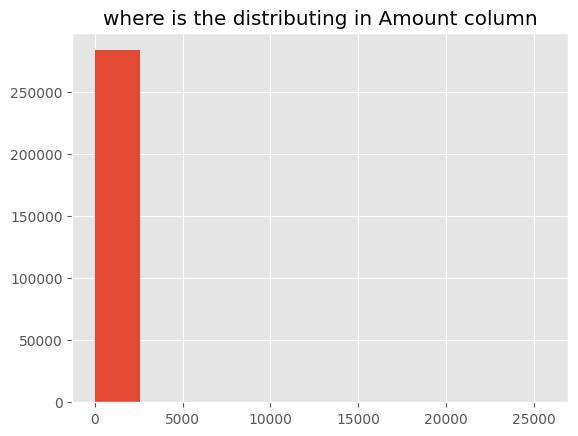

In [10]:
# using histogram, to show the Amount columns where is the distributing

plt.hist (data= df, x="Amount")
plt.title("where is the distributing in Amount column")
plt.show()

In [11]:
#show the first 10 values / amount the highest 
df["Amount"].sort_values(ascending=False).head(10)

274771    25691.16
58465     19656.53
151296    18910.00
46841     12910.93
54018     11898.09
169457    11789.84
284249    10199.44
227921    10000.00
74699      8790.26
245474     8787.00
Name: Amount, dtype: float64

<a id="3"></a>
# <p style="padding:10px;background-color:#d896ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2️⃣ Building a Machine Learning Model || Classification - Before Feature Selection</p>

In [12]:
#Importing the basic librarires for building model  / Classification 
from sklearn.model_selection import train_test_split

from sklearn.metrics import  classification_report ,confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC

In [13]:
#Defined X value and y value , and split the data train

X = df.drop(columns="Class")           
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 30)
X Test  :  (70932, 30)
Y Train :  (212794,)
Y Test  :  (70932,)


In [14]:
#Defined object from library Classification  / from the libraries import before / 6 model

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVC=SVC()

In [15]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.77      0.64      0.70       112

    accuracy                           1.00     70932
   macro avg       0.89      0.82      0.85     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.70      0.78      0.74       112

    accuracy                           1.00     70932
   macro avg       0.85      0.89      0.87     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.75      0.84       112

    accuracy   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
MLPClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.50      0.02      0.03       112

    accuracy                           1.00     70932
   macro avg       0.75      0.51      0.52     70932
weighted avg       1.00      1.00      1.00     70932

********************************************


<a id="3"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> 3️⃣ Make Deep learning - Model - Classification - Before Feature Selection || using TensorFlow</p>

In [16]:
#Importing the basic librarires for deep learning

import tensorflow as tf
import keras


2024-06-04 12:38:18.034040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 12:38:18.034167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 12:38:18.176652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
# Model Definition 

Cla_M = keras.models.Sequential([
    keras.layers.Input(shape=30),
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation="sigmoid"),
    keras.layers.Dense(64,activation="tanh"),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(1,activation='sigmoid') # we have one class 0 or 1
    
])

In [18]:
# create optimizers

optimz= tf.keras.optimizers.experimental.Adam()


In [19]:
# compile  // using Binary Crossentropy

Cla_M.compile(optimizer=optimz,loss='binary_crossentropy',metrics=['accuracy'])


In [20]:
#fiting Model  

Mod_fit = Cla_M.fit(X_train,y_train,
              validation_data=(X_test,y_test),
               epochs=100,
              batch_size=10000, 
               verbose=1,
              callbacks=[ tf.keras.callbacks.EarlyStopping(
              patience=10,monitor='val_accuracy',restore_best_weights=True)])

Epoch 1/100
22/22 [==============================] - 2s 33ms/step - loss: 0.2170 - accuracy: 0.8577 - val_loss: 0.0125 - val_accuracy: 0.9984
Epoch 2/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0126 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 3/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 5/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 6/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 7/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0118 - val_accuracy: 0.9984
Epoch 

- Good Accuracy = 99.8 %

In [21]:
#The Summary 

Cla_M.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9721 (37.97 KB)
Trainable params: 9721 (37.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# model Evaluate

Model_loss, Model_Accuracy = Cla_M.evaluate(X_test,y_test)
print("Model Loss : " ,Model_loss )
print("Model Accuracy : " ,Model_Accuracy )

2217/2217 [==============================] - 3s 1ms/step - loss: 0.0125 - accuracy: 0.9984
Model Loss :  0.01246852707117796
Model Accuracy :  0.9984210133552551


In [23]:
# make y prediction 
y_pred = Cla_M.predict(X_test)


2217/2217 [==============================] - 3s 1ms/step


In [24]:
y_pred


array([[0.00356972],
       [0.00356972],
       [0.00356972],
       ...,
       [0.00356972],
       [0.00356972],
       [0.00356972]], dtype=float32)

In [25]:
# I need change / round the number to 0 or 1
y_pred= [np.round(i[0]) for i in y_pred]


In [26]:
# Confusion Matrix
C_M = confusion_matrix(y_test,y_pred)
C_M

array([[70820,     0],
       [  112,     0]])

<Axes: >

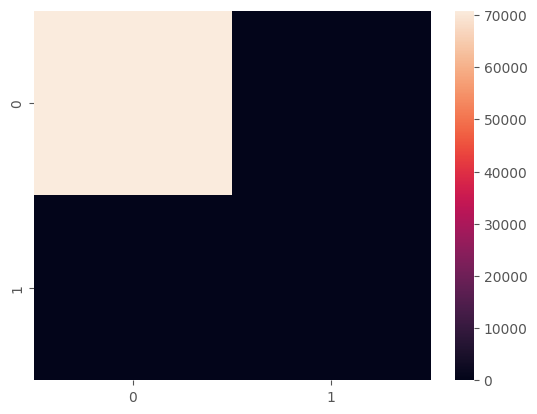

In [27]:
sns.heatmap(C_M)


In [28]:
# Classifcation Report
C_R = classification_report(y_test,y_pred)
print("The Classification Report : \n", C_R)

The Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.00      0.00      0.00       112

    accuracy                           1.00     70932
   macro avg       0.50      0.50      0.50     70932
weighted avg       1.00      1.00      1.00     70932



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


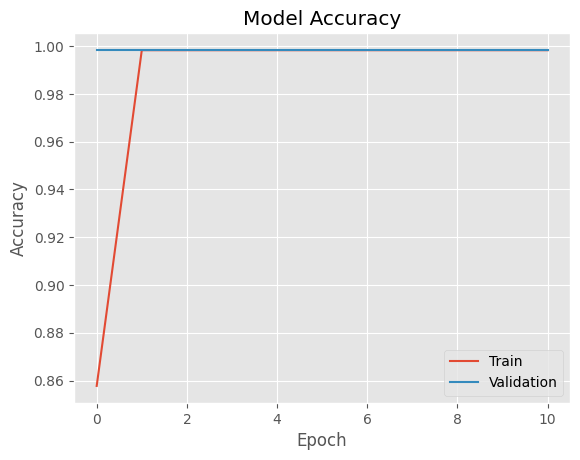

In [29]:
# Drow the Model Accuracy 

plt.plot(Mod_fit.history["accuracy"])
plt.plot(Mod_fit.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()

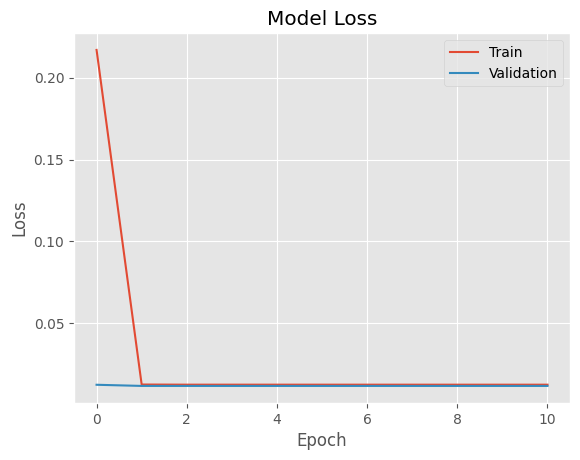

In [30]:
# Drow the Model Loss 

plt.plot(Mod_fit.history["loss"])
plt.plot(Mod_fit.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"])
plt.show()

<a id="3"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4️⃣ Building a Machine Learning Model || Classification - Before Feature Selection</p>

In [31]:
# import model Feature selection for choice number of columns depends on the correlation between the values and the output

from sklearn.feature_selection import SelectPercentile

In [32]:
# we need choice 50 % of the feature

F_50 = SelectPercentile( percentile= 50)

In [33]:
#make the transform

set_X = F_50.fit_transform(X,y)

In [34]:
#now choice 50% of the original data and put in the new DataFrame and put the same header name from the original data

new_x =pd.DataFrame(set_X,columns= [ i for i,j in zip (X.columns, F_50.get_support()) if j == True ])
new_x

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981


- This columns we need after the python choice 

In [35]:
# y columns , it`s the same columns - calss
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [36]:
# split the new data 

X = new_x      
y = df["Class"]    # y = class

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (212794, 15)
X Test  :  (70932, 15)
Y Train :  (212794,)
Y Test  :  (70932,)


In [37]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,SVC,MLP]

for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",classification_report(y_test,ypred))
    print("********************************************")

LogisticRegression() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.90      0.54      0.67       112

    accuracy                           1.00     70932
   macro avg       0.95      0.77      0.83     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
DecisionTreeClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.75      0.69      0.72       112

    accuracy                           1.00     70932
   macro avg       0.87      0.84      0.86     70932
weighted avg       1.00      1.00      1.00     70932

********************************************
RandomForestClassifier() :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.94      0.74      0.83       112

    accuracy   

<a id="3"></a>
# <p style="padding:10px;background-color:#ff96ff;margin:0;color:#660066;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5️⃣Make Deep learning - Classification - After Feature Selection using || TensorFlow</p>

In [38]:
# Model Definition 

Cla_M1 = keras.models.Sequential([
    
    keras.layers.Dense(8,activation='tanh'),
    keras.layers.Dense(128,activation="sigmoid"),
    keras.layers.Dense(64,activation="tanh"),
    keras.layers.Dropout(0,2),
    keras.layers.Dense(1,activation='sigmoid') # we have one class 0 or 1
    
])

In [39]:
# create optimizers

optimz= tf.keras.optimizers.experimental.Adam()

In [40]:
# compile  // using Binary Crossentropy

Cla_M1.compile(optimizer=optimz,loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
#fiting Model  

Mod_fit1 = Cla_M1.fit(X_train,y_train,
              validation_data=(X_test,y_test),
               epochs=100,
              batch_size=10000, 
               verbose=1,
              callbacks=[ tf.keras.callbacks.EarlyStopping(
              patience=10,monitor='val_accuracy',restore_best_weights=True)])

Epoch 1/100
22/22 [==============================] - 2s 26ms/step - loss: 0.0980 - accuracy: 0.9982 - val_loss: 0.0122 - val_accuracy: 0.9984
Epoch 2/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0115 - val_accuracy: 0.9984
Epoch 3/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 0.0113 - val_accuracy: 0.9984
Epoch 4/100
22/22 [==============================] - 0s 18ms/step - loss: 0.0119 - accuracy: 0.9983 - val_loss: 0.0111 - val_accuracy: 0.9984
Epoch 5/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0117 - accuracy: 0.9983 - val_loss: 0.0108 - val_accuracy: 0.9984
Epoch 6/100
22/22 [==============================] - 0s 22ms/step - loss: 0.0113 - accuracy: 0.9983 - val_loss: 0.0105 - val_accuracy: 0.9984
Epoch 7/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0109 - accuracy: 0.9983 - val_loss: 0.0101 - val_accuracy: 0.9984
Epoch 

In [42]:
#The Summary 

Cla_M.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9721 (37.97 KB)
Trainable params: 9721 (37.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# model Evaluate

Model_loss, Model_Accuracy = Cla_M1.evaluate(X_test,y_test)
print("Model Loss : " ,Model_loss )
print("Model Accuracy : " ,Model_Accuracy )

2217/2217 [==============================] - 3s 1ms/step - loss: 0.0122 - accuracy: 0.9984
Model Loss :  0.012237709015607834
Model Accuracy :  0.9984210133552551


- The same results after feature selection

# <div style = 'border : 3px solid non; background-color:#ffffff;font-family:Gabriola;color:#000080; ; ;padding:10px'>
<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:150%;">   </font>
    <p style = "font-size:200%; color:#800080"> 📌 Result ML</p>
    
- We see the results after select 50 % of columns ,better than before without select 50 % of columns

#  📲 Connect me:
-  <a href="https://www.kaggle.com/qusaybtoush1990">kaggle</a>
-  <a href="https://www.linkedin.com/in/qusayal-btoush/">Linkedin</a>
-  <a href="https://github.com/qusaybtoush">github</a>

# Vote ❤️😃
- Please Upvote my kernel if you like my work.🙌

# The End 🤝🎉🤝🎉
### 🖐 Thank you 🙏